In [1]:
import pandas as pd
import albumentations as A
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-09-26 16:50:45.764902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 16:50:45.779226: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 16:50:45.783376: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 16:50:45.792875: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-26 16:50:46.681149: W tensorflow/compiler/tf2

In [2]:
from Preprocessamento import preprocessamento, preprocessamento_dataframe

In [3]:
treino_gerador, validacao_gerador, teste_gerador, treino, validacao, teste = preprocessamento("Datasets_csv/df_PUC.csv", autoencoder=False)

Found 6000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


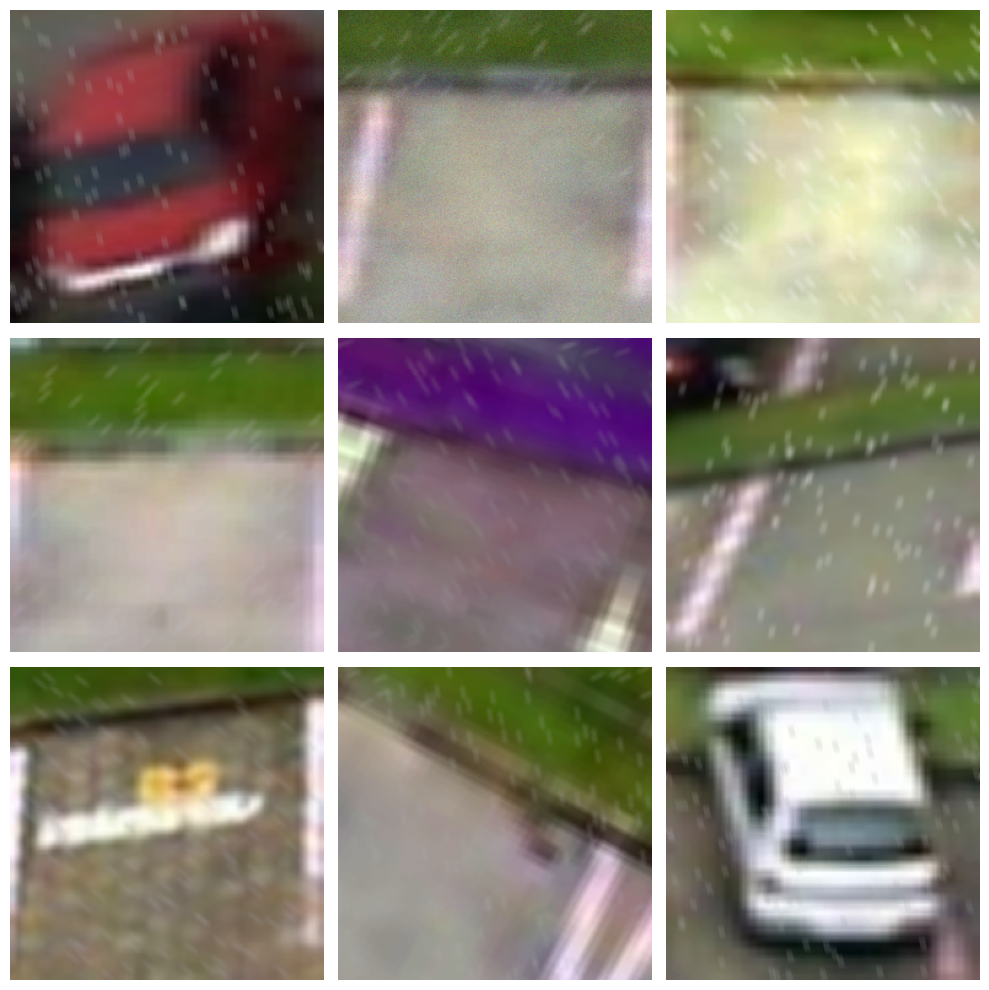

<Figure size 640x480 with 0 Axes>

In [4]:
from visualizacao import plot_imagens_dataframe_gerador

plot_imagens_dataframe_gerador(treino_gerador)

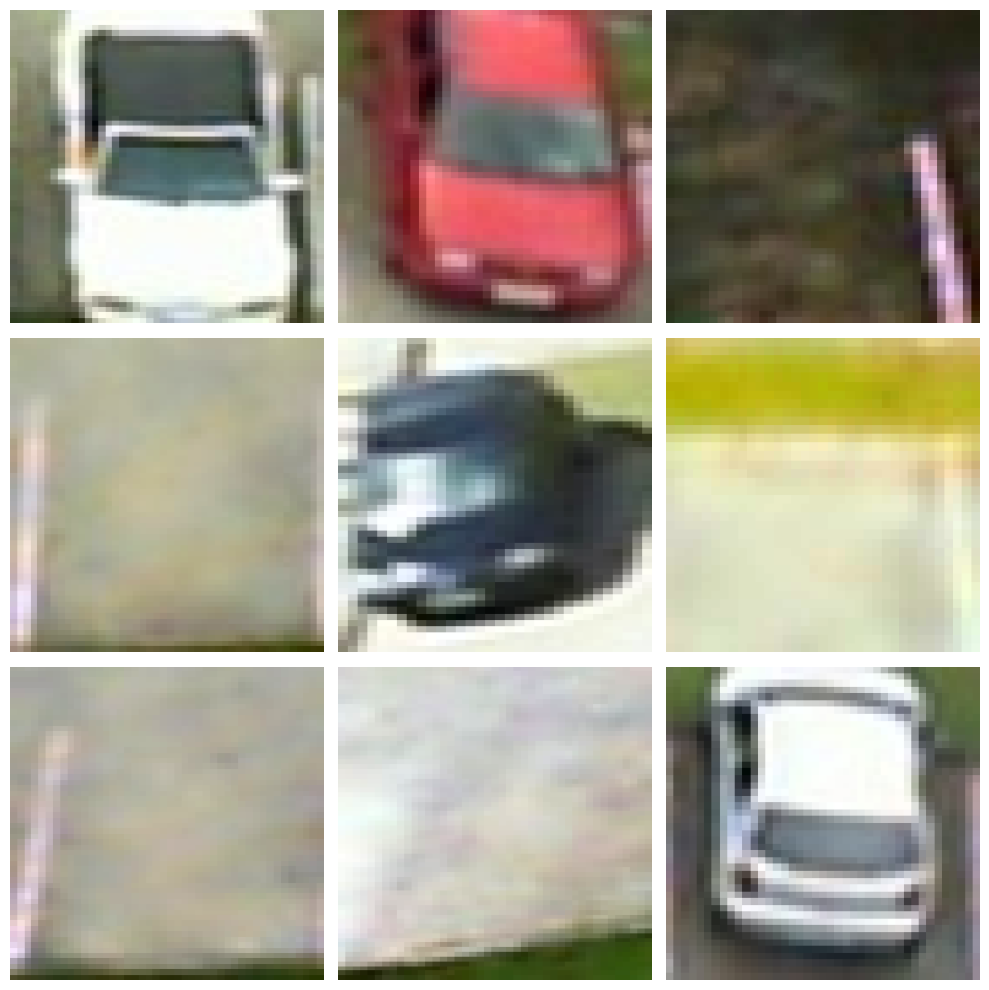

<Figure size 640x480 with 0 Axes>

In [5]:
plot_imagens_dataframe_gerador(teste_gerador)

In [6]:
from Modelos import Autoencoder 

autoencoder = Autoencoder()

modelo = autoencoder.model

/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1727380248.671552   39570 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727380248.705328   39570 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727380248.705488   39570 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at http

In [7]:
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Sequential)            │ (None, 4, 4, 128)      │        97,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Sequential)            │ (None, 64, 64, 3)      │       244,899 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 342,339 (1.31 MB)

 Trainable params: 342,339 (1.31 MB)

 Non-trainable params: 0 (0.00 B)